In [1]:
# instalo geopandas 
!pip install geopandas

     |████████████████████████████████| 972kB 5.8MB/s 
     |████████████████████████████████| 14.8MB 303kB/s 
     |████████████████████████████████| 10.9MB 49.4MB/s 


In [2]:
# instalo mapclassify
!pip install mapclassify

In [3]:
# importo librerias
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# descargo los datos
!git clone https://github.com/alephcero/untref_analisis_espacial_2020.git

Cloning into 'untref_analisis_espacial_2020'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 12 (delta 1), reused 8 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.


In [5]:
radios = gpd.read_file('/content/untref_analisis_espacial_2020/carto/caba_radios_censales.geojson')

In [6]:
#visualizo los primeros registros de mi variable radios
radios.head()

,RADIO_ID,BARRIO,COMUNA,POBLACION,VIVIENDAS,HOGARES,HOGARES_NBI,AREA_KM2,geometry
0,1_1_1,RETIRO,1,336.0,82.0,65.0,19.0,1.798997,"MULTIPOLYGON (((-58.37189 -34.59199, -58.37202..."
1,1_12_1,SAN NICOLAS,1,341.0,365.0,116.0,25.0,0.018565,"MULTIPOLYGON (((-58.38593 -34.60444, -58.38575..."
2,1_12_10,SAN NICOLAS,1,296.0,629.0,101.0,1.0,0.044380,"MULTIPOLYGON (((-58.37879 -34.60528, -58.37741..."
3,1_12_11,SAN NICOLAS,1,528.0,375.0,136.0,7.0,0.366340,"MULTIPOLYGON (((-58.36733 -34.60562, -58.36713..."
4,1_12_2,SAN NICOLAS,1,229.0,445.0,129.0,16.0,0.018363,"MULTIPOLYGON (((-58.38454 -34.60436, -58.38311..."


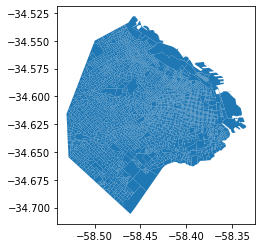

In [7]:
#realizo un primer plot sencillo de mi shape
radios.plot()

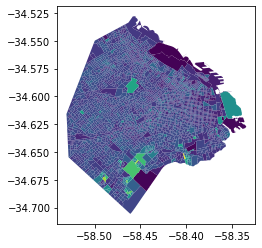

In [9]:
#realizo otro plot sin especificar algun criterio de visualizacion
radios.plot(column = "POBLACION")

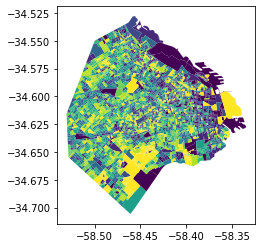

In [11]:
#realizo un plot especificando criterios de visualizacion de 10 quintiles 
radios.plot(column = "POBLACION", scheme = "Quantiles", k = 10)

In [10]:
#reproyecto mi cartografia a una proyeccion en metros. Pueden leer mas en: http://epsg.io/3857
radios_metros = radios.to_crs(epsg = 3857)
radios_metros.head()

,RADIO_ID,BARRIO,COMUNA,POBLACION,VIVIENDAS,HOGARES,HOGARES_NBI,AREA_KM2,geometry
0,1_1_1,RETIRO,1,336.0,82.0,65.0,19.0,1.798997,"MULTIPOLYGON (((-6497929.484 -4108572.020, -64..."
1,1_12_1,SAN NICOLAS,1,341.0,365.0,116.0,25.0,0.018565,"MULTIPOLYGON (((-6499491.512 -4110255.197, -64..."
2,1_12_10,SAN NICOLAS,1,296.0,629.0,101.0,1.0,0.044380,"MULTIPOLYGON (((-6498696.826 -4110369.483, -64..."
3,1_12_11,SAN NICOLAS,1,528.0,375.0,136.0,7.0,0.366340,"MULTIPOLYGON (((-6497420.916 -4110414.929, -64..."
4,1_12_2,SAN NICOLAS,1,229.0,445.0,129.0,16.0,0.018363,"MULTIPOLYGON (((-6499336.819 -4110244.172, -64..."


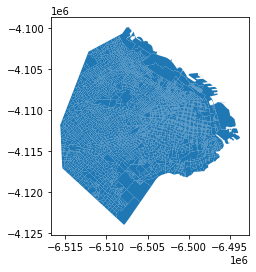

In [12]:
#los ejes de coordenadas ya nos nuestran un cambio de unidad de medida
radios_metros.plot()

In [13]:
#obtenemos el area de cada radio censal al extraer la PROPIEDAD geografica area de nuestra columna geometry. Area no lleva () porque es una propiedad, no una funcion. Veremos esto mas adelante.
radios_metros["area_m"] = radios_metros.geometry.area

In [14]:
#como nuestra proyeccion esta en metros y queremos pasarlo a km2, debemos dividir nuestra columna area en metros (area_m) por 1000000
radios_metros["area_km"] = radios_metros.area_m / 1000000

In [16]:
#finalmente dividimos nuestra poblacion por el area en km2
radios_metros['densidad'] = radios_metros.POBLACION / radios_metros.area_km

radios_metros.head()

,RADIO_ID,BARRIO,COMUNA,POBLACION,VIVIENDAS,HOGARES,HOGARES_NBI,AREA_KM2,geometry,area_m,area_km,densidad
0,1_1_1,RETIRO,1,336.0,82.0,65.0,19.0,1.798997,"MULTIPOLYGON (((-6497929.484 -4108572.020, -64...",2.660685e+06,2.660685,126.283256
1,1_12_1,SAN NICOLAS,1,341.0,365.0,116.0,25.0,0.018565,"MULTIPOLYGON (((-6499491.512 -4110255.197, -64...",2.746859e+04,0.027469,12414.178936
2,1_12_10,SAN NICOLAS,1,296.0,629.0,101.0,1.0,0.044380,"MULTIPOLYGON (((-6498696.826 -4110369.483, -64...",6.566604e+04,0.065666,4507.657512
3,1_12_11,SAN NICOLAS,1,528.0,375.0,136.0,7.0,0.366340,"MULTIPOLYGON (((-6497420.916 -4110414.929, -64...",5.420509e+05,0.542051,974.078198
4,1_12_2,SAN NICOLAS,1,229.0,445.0,129.0,16.0,0.018363,"MULTIPOLYGON (((-6499336.819 -4110244.172, -64...",2.717014e+04,0.027170,8428.368902


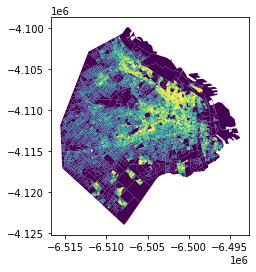

In [17]:
#ploteamos los resultados
radios_metros.plot(column = "densidad",scheme = "Quantiles", k = 10)

In [18]:
# podemos visualizar menos datos, solo algunas columnas 
radios_metros.loc[:,['RADIO_ID','densidad']].head()

,RADIO_ID,densidad
0,1_1_1,126.283256
1,1_12_1,12414.178936
2,1_12_10,4507.657512
3,1_12_11,974.078198
4,1_12_2,8428.368902


In [19]:
# o solo algunas filas
radios_metros.loc[:7,['RADIO_ID','densidad']]

,RADIO_ID,densidad
0,1_1_1,126.283256
1,1_12_1,12414.178936
2,1_12_10,4507.657512
3,1_12_11,974.078198
4,1_12_2,8428.368902
5,1_12_3,13305.120195
6,1_12_4,15893.113307
7,1_12_5,12166.408319


In [21]:
#podemos hacer esto mismo seleccionando valores de la variable
radios_metros.loc[radios_metros.BARRIO == 'RETIRO',['RADIO_ID','BARRIO','densidad']]

,RADIO_ID,BARRIO,densidad
0,1_1_1,RETIRO,126.283256
102,1_4_1,RETIRO,46077.256992
103,1_4_2,RETIRO,27637.319351
104,1_4_3,RETIRO,19428.007270
105,1_4_4,RETIRO,39629.425358
...,...,...,...
3515,1_3_9,RETIRO,54904.070003
3516,1_3_21,RETIRO,359.906659
3549,1_3_12,RETIRO,32165.076543
3550,1_3_11,RETIRO,30296.105538


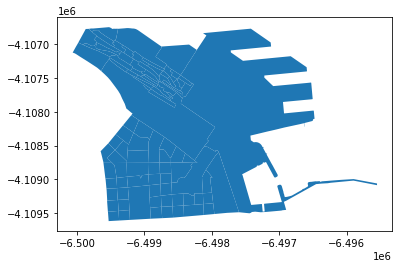

In [23]:
# vemos que tanto al principio como al final todos los registros (91 en este caso) son de retiro. 
# pero la ventaja de datos espaciales es que podemos visualizarlos y ver si obtuvimos lo que queriamos
# AGREGAMOS LA VARIABLE GEOMETRY, ES IMPORTANTE!

radios_metros.loc[radios_metros.BARRIO == 'RETIRO',['RADIO_ID','BARRIO','densidad','geometry']].plot()

In [24]:
# vamos a seleccionar radios de la comuna 4 y ver de obtener algunos estadisticos. 
# Asi vemos que CANTIDAD de radios hay en cada comuna
radios_metros.COMUNA.value_counts()

1     329
13    305
14    295
3     254
4     252
7     250
15    238
11    229
12    226
5     218
6     215
2     198
10    197
9     186
8     162
Name: COMUNA, dtype: int64

In [25]:
# podemos leer la documentacion y ver si podemos obtenerlo porcentajes
radios_metros.COMUNA.value_counts?

In [28]:
# asi los tenemos en proporciones
radios_metros.COMUNA.value_counts(normalize = True) 

1     0.092572
13    0.085819
14    0.083005
3     0.071469
4     0.070906
7     0.070343
15    0.066967
11    0.064434
12    0.063590
5     0.061339
6     0.060495
2     0.055712
10    0.055431
9     0.052335
8     0.045582
Name: COMUNA, dtype: float64

In [29]:
# para porcentajes solo tenemos que multiplicar por 100
radios_metros.COMUNA.value_counts(normalize = True) * 100

1     9.257175
13    8.581880
14    8.300506
3     7.146877
4     7.090602
7     7.034328
15    6.696680
11    6.443444
12    6.359032
5     6.133934
6     6.049522
2     5.571187
10    5.543050
9     5.233540
8     4.558244
Name: COMUNA, dtype: float64

In [33]:
#creamos otra variable que sea el % de hogaron con NBI por radio
radios_metros['NBI'] = radios_metros['HOGARES_NBI'] / radios_metros['HOGARES'] * 100
radios_metros.loc[:5,['RADIO_ID','NBI']]

,RADIO_ID,NBI
0,1_1_1,29.230769
1,1_12_1,21.551724
2,1_12_10,0.990099
3,1_12_11,5.147059
4,1_12_2,12.403101
5,1_12_3,33.121019


In [49]:
#obtenemos estadisticos
estadisticos_caba = radios_metros.NBI.describe()
estadisticos_caba

count    3552.000000
mean        6.151398
std         9.595624
min         0.000000
25%         0.605603
50%         1.884256
75%         7.588378
max        88.888889
Name: NBI, dtype: float64

In [51]:
nbi_caba = estadisticos_caba['mean']
print('El NBI en CABA es de:',nbi_caba)

El NBI en CABA es de: 6.151397640713864


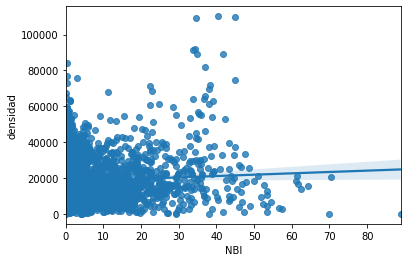

In [37]:
#hay relacion entre densidad y NBI ?
sns.regplot(x="NBI", y="densidad", data=radios_metros)

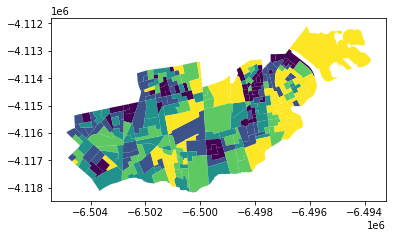

In [47]:
comuna_4 =  radios_metros.loc[ radios_metros.COMUNA == '4',['RADIO_ID','NBI','geometry']]
comuna_4.plot(column = "NBI",scheme = "Quantiles", k = 5)

In [52]:
estadisticos_comuna_4 = comuna_4.NBI.describe()
estadisticos_comuna_4

count    252.000000
mean      12.827940
std       13.503061
min        0.000000
25%        2.754143
50%        9.284017
75%       17.416560
max       88.888889
Name: NBI, dtype: float64

In [54]:
nbi_comuna_4 = estadisticos_comuna_4['mean']
nbi_comuna_4

12.827939618538657

In [56]:
print('El NBI en CABA es de %.2f mientras que en la Comuna 4 es de %.2f' % (nbi_caba,nbi_comuna_4))

El NBI en CABA es de 6.15 mientras que en la Comuna 4 es de 12.83


In [59]:
#Podemos agregar algo de logica
if nbi_caba > nbi_comuna_4:
  texto_comparativo = 'ALTO'
else:
  texto_comparativo = 'BAJO'

print('El NBI en CABA es mas %s que el de la Comuna 4, ya que mientras que en CABA es de %.2f, en la Comuna 4 es de %.2f' % (texto_comparativo,nbi_caba,nbi_comuna_4))

El NBI en CABA es mas BAJO que el de la Comuna 4, ya que mientras que en CABA es de 6.15, en la Comuna 4 es de 12.83
